<a href="https://colab.research.google.com/github/MagomedNalgiev/Google-Colab/blob/main/ML_learn_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.drop(['deck', 'embark_town', 'alive', 'adult_male', 'who'], axis=1, inplace=True)
titanic.dropna(subset=['age', 'embarked'], inplace=True)

KeyError: "['deck', 'embark_town', 'alive', 'adult_male', 'who'] not found in axis"

In [9]:
titanic = pd.get_dummies(titanic, drop_first=True)

In [11]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [17]:
params = {
    'objective': 'binary:logistic',  # задача бинарной классификации
    'max_depth': 4,  # максимальная глубина дерева
    'eta': 0.1,  # шаг обучения
    'subsample': 0.8,  # доля выборки для создания дерева
    'colsample_bytree': 0.8  # доля признаков для создания дерева
}

In [19]:
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

In [21]:
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        80
           1       0.81      0.68      0.74        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



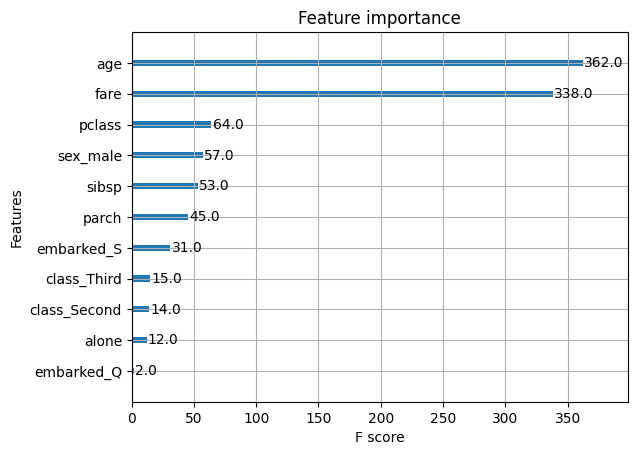

In [24]:
xgb.plot_importance(bst)
plt.show()